# Importing all libraries

In [1]:
import pandas as pd #to work with dataframes
import numpy as np #to work with arrays,matrices,includes large collection of math functions
import matplotlib.pyplot as plt #library for data visualizations in Python
import seaborn as sns #data visualization library with a high-level interface

# Data Cleaning, Data Transformation and Descriptive Statistics

## Pandas

[**Pandas**](https://pandas.pydata.org/) is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming.

In [2]:
#reading data
data=pd.read_excel("Bank_data.xlsx")

In [3]:
#lets see how the data looks 
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx2,euribor3m,nr_employed,term_deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,41.8,4.962,5228.1,no
3,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,42.0,4.191,5195.8,no
4,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,37.5,0.884,4963.6,no


In [4]:
#let's look at all the variables and their types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3235 non-null   int64  
 1   job             3232 non-null   object 
 2   marital         3235 non-null   object 
 3   education       3235 non-null   object 
 4   default         3235 non-null   object 
 5   housing         3232 non-null   object 
 6   loan            3235 non-null   object 
 7   contact         3235 non-null   object 
 8   month           3235 non-null   object 
 9   day_of week     3235 non-null   object 
 10  duration        3235 non-null   int64  
 11  campaign        3235 non-null   int64  
 12  pdays           3235 non-null   int64  
 13  previous        3235 non-null   int64  
 14  poutcome        3235 non-null   object 
 15  emp_var_rate    3235 non-null   float64
 16  cons_price_idx  3235 non-null   float64
 17  cons_conf_idx2  3235 non-null   f

In [5]:
#shape attribute can be used to get number of rows and columns in the data
data.shape

(3235, 21)

In [6]:
#let's check for NA's in another way
data.isnull().values.any()

True

In [7]:
#let's see which variables have missing values and how many 
data.isnull().sum()

age               0
job               3
marital           0
education         0
default           0
housing           3
loan              0
contact           0
month             0
day_of week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx2    0
euribor3m         0
nr_employed       0
term_deposit      0
dtype: int64

In [8]:
#getting description of numeric data
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx2,euribor3m,nr_employed
count,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000
mean,39.311901,259.800927,2.509428,952.026584,0.212056,-0.061206,93.531650,40.558887,3.466875,5160.250974
std,10.303260,262.956331,2.585368,210.859618,0.572653,1.604765,0.587567,4.755493,1.777472,76.953731
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,26.900000,0.635000,4963.600000
25%,31.500000,105.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,36.400000,1.313000,5099.100000
50%,37.000000,182.000000,2.000000,999.000000,0.000000,1.100000,93.444000,41.800000,4.856000,5191.000000
75%,46.000000,316.000000,3.000000,999.000000,0.000000,1.400000,93.994000,42.700000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,50.800000,5.045000,5228.100000


In [9]:
#let's drop NAs
data.dropna(inplace=True)

In [10]:
#let's check again for missing values
data.isnull().values.any()

False

    There are no missing values anymore.

In [11]:
#you can drop a column also 
data.drop("pdays",
          axis=1, #=0 if you wnat to dorp row, and =1 if you drop column
          inplace=True) #use this to save changes in the data

In [12]:
data.shape #now there are 20 variables

(3229, 20)

In [13]:
#sorting the data
data[["age","job"]].sort_values(by="age", ascending=False).head(10)

,age,job
932,88,retired
120,82,housemaid
2780,82,housemaid
3196,81,retired
3195,81,retired
262,81,retired
2508,80,retired
2866,80,retired
2376,80,retired
1218,80,retired


In [14]:
#let's separate numeric and object variables and save them as separate dataframes
data_numeric = data.select_dtypes(exclude=["object"])
data_object = data.select_dtypes(include=["object"])

In [15]:
#let's see how many categories are inside job variable
data.job.unique()

array(['blue-collar', 'services', 'admin.', 'self-employed', 'technician',
       'management', 'student', 'retired', 'entrepreneur', 'housemaid',
       'unemployed', 'unknown'], dtype=object)

In [16]:
#let's see how many categories are inside job variable with number of observations
data["job"].value_counts()

admin.           874
technician       590
blue-collar      577
services         288
management       277
self-employed    130
retired          124
entrepreneur     110
unemployed        90
housemaid         78
student           70
unknown           21
Name: job, dtype: int64

In [17]:
#let's see categories and number of observations in each category for all object variables
for i in data_object.columns:
    j=data[i].value_counts()
    print(i,"\n",j,"\n","\n")
    print("--------------------")

job 
 admin.           874
technician       590
blue-collar      577
services         288
management       277
self-employed    130
retired          124
entrepreneur     110
unemployed        90
housemaid         78
student           70
unknown           21
Name: job, dtype: int64 
 

--------------------
marital 
 married     1862
single       996
divorced     361
unknown       10
Name: marital, dtype: int64 
 

--------------------
education 
 university.degree      1112
high.school             731
professional.course     455
basic.9y                412
basic.4y                249
basic.6y                151
unknown                 118
illiterate                1
Name: education, dtype: int64 
 

--------------------
default 
 no     3228
yes       1
Name: default, dtype: int64 
 

--------------------
housing 
 yes    1759
no     1470
Name: housing, dtype: int64 
 

--------------------
loan 
 no     2698
yes     531
Name: loan, dtype: int64 
 

--------------------
contact 
 cellul

    We can use max(), min(), mean(), median() functions to get respective statistics.

In [18]:
print(round(data.age.mean(),2))
print(data.age.median())
print(data.age.min())
print(data.age.max())

39.31
37.0
18
88


In [19]:
#let's check correlations between numeric variables
data_numeric.corr()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx2,euribor3m,nr_employed
age,1.000000,0.044858,-0.029626,0.058073,-0.054664,-0.035728,-0.090506,-0.045577,-0.065841
duration,0.044858,1.000000,-0.079278,0.025069,-0.027002,0.021428,0.035923,-0.029031,-0.041507
campaign,-0.029626,-0.079278,1.000000,-0.090459,0.187738,0.147877,-0.016136,0.170208,0.166976
previous,0.058073,0.025069,-0.090459,1.000000,-0.395866,-0.134847,0.025911,-0.442237,-0.500778
emp_var_rate,-0.054664,-0.027002,0.187738,-0.395866,1.000000,0.741630,-0.146936,0.967338,0.890293
cons_price_idx,-0.035728,0.021428,0.147877,-0.134847,0.741630,1.000000,-0.000226,0.630315,0.432986
cons_conf_idx2,-0.090506,0.035923,-0.016136,0.025911,-0.146936,-0.000226,1.000000,-0.234182,-0.077460
euribor3m,-0.045577,-0.029031,0.170208,-0.442237,0.967338,0.630315,-0.234182,1.000000,0.942587
nr_employed,-0.065841,-0.041507,0.166976,-0.500778,0.890293,0.432986,-0.077460,0.942587,1.000000


In [20]:
#groupby() function
data.groupby(["education"]).mean()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx2,euribor3m,nr_employed
education,,,,,,,,,
basic.4y,46.618474,249.662651,2.377510,0.176707,-0.106426,93.546582,41.007631,3.393394,5158.395984
basic.6y,40.019868,247.629139,2.635762,0.145695,0.135762,93.628861,41.905298,3.671305,5171.972185
basic.9y,38.398058,259.652913,2.320388,0.182039,0.042476,93.586803,41.715049,3.573184,5168.049757
high.school,37.796170,263.954856,2.615595,0.233926,-0.155814,93.520720,41.035841,3.346104,5156.301231
illiterate,42.000000,146.000000,4.000000,0.000000,-2.900000,92.201000,31.400000,0.834000,5076.200000
professional.course,39.520879,281.063736,2.373626,0.204396,0.100879,93.580121,40.117582,3.631765,5164.241758
university.degree,38.611511,251.276978,2.573741,0.221223,-0.089388,93.480507,39.878867,3.461815,5159.339209
unknown,41.279661,268.059322,2.593220,0.296610,-0.383051,93.537085,39.150000,3.101339,5138.088136


In [21]:
data.groupby(["education"])["age"].mean()

education
basic.4y               46.618474
basic.6y               40.019868
basic.9y               38.398058
high.school            37.796170
illiterate             42.000000
professional.course    39.520879
university.degree      38.611511
unknown                41.279661
Name: age, dtype: float64

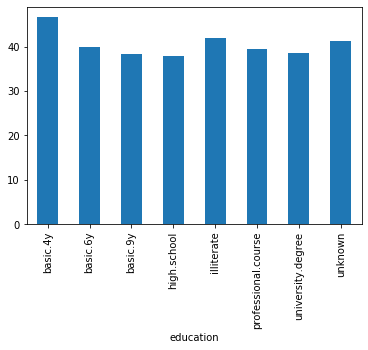

In [22]:
#groupby() function and plotting in pandas
data.groupby(["education"])["age"].mean().plot(kind='bar')
plt.show()

In [23]:
#creating pivot table with pandas
pd.pivot_table(data,columns='education',index='job',values='age', aggfunc='mean')

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,44.500000,42.625000,40.580645,38.402299,NaN,41.212121,37.025490,43.421053
blue-collar,41.429752,37.710000,35.671171,35.476923,NaN,37.560976,36.500000,38.791667
entrepreneur,40.363636,39.000000,43.733333,37.000000,NaN,44.181818,41.333333,48.750000
housemaid,47.483871,45.666667,41.000000,40.375000,NaN,51.285714,41.400000,54.000000
management,49.000000,47.166667,44.437500,40.558824,NaN,44.200000,41.436548,43.750000
retired,64.525000,57.500000,59.250000,59.681818,42.0,59.666667,62.888889,63.666667
self-employed,42.250000,NaN,43.695652,42.363636,NaN,37.900000,38.835443,32.000000
services,42.000000,42.857143,38.190476,37.016216,NaN,36.000000,35.733333,43.727273
student,24.000000,NaN,27.000000,24.935484,NaN,26.750000,30.000000,26.000000


## Numpy

[**Numpy**](https://numpy.org/) is the fundamental package for scientific computing with Python.

In [33]:
print(round(np.mean(data["age"]),2))
print(np.max(data["age"]))
print(np.min(data["age"]))
print(round(np.std(data["age"]),2))
print(np.median(data["age"]))

39.31
88
18
10.31
37.0


In [25]:
age_array=np.array(data["age"])

In [26]:
age_array[0:10]

array([30, 39, 25, 47, 32, 32, 31, 36, 29, 27], dtype=int64)

In [27]:
type(age_array)

numpy.ndarray

## Matplotlib

[**Matplotlib**](https://matplotlib.org/tutorials/index.html) is a Python 2D plotting library. It is used in the Python scripts and shells, as well as in the IPython shells and Jupyter Notebook to generate figures and plots in a different formats. One of the advantages of the library is being open-source and free. Its pyplot module is an MATLAB-like interface which is very easy to use for simple plotting. It lets you to customize a figure by having control on line, axes, font styles, etc.

In [28]:
data.groupby('education')['age'].mean()

education
basic.4y               46.618474
basic.6y               40.019868
basic.9y               38.398058
high.school            37.796170
illiterate             42.000000
professional.course    39.520879
university.degree      38.611511
unknown                41.279661
Name: age, dtype: float64

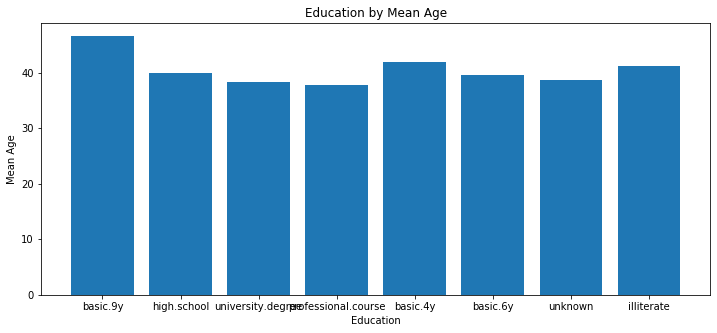

In [29]:
plt.figure(figsize=(12,5))#making the plot bigger
#draw plot
plt.bar(data.education.unique(), 
        data.groupby('education')['age'].mean()) #defining x and y variables

#giving titles
plt.title("Education by Mean Age")
plt.xlabel("Education")
plt.ylabel("Mean Age")

#showing the plot
plt.show()

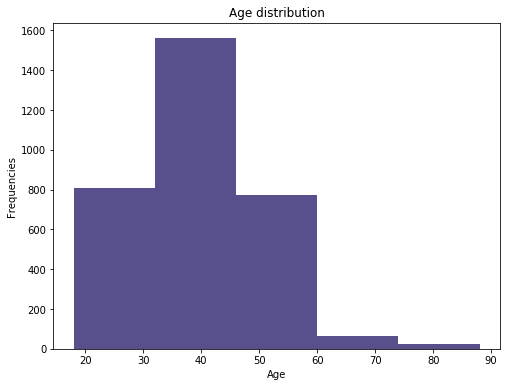

In [30]:
plt.figure(figsize=(8,6)) #making the plot bigger
#draw plot
plt.hist(data.age, 
         bins=5, #defining number of bins
         color="#58508d" #changing color
)
plt.title("Age distribution") #giving a title to the graph
plt.ylabel("Frequencies")#giving title to y axis
plt.xlabel("Age")#giving title to x axis
plt.show()#showing the plot


## Seaborn

    Seaborn ia a data visualization library with a high-level interface.

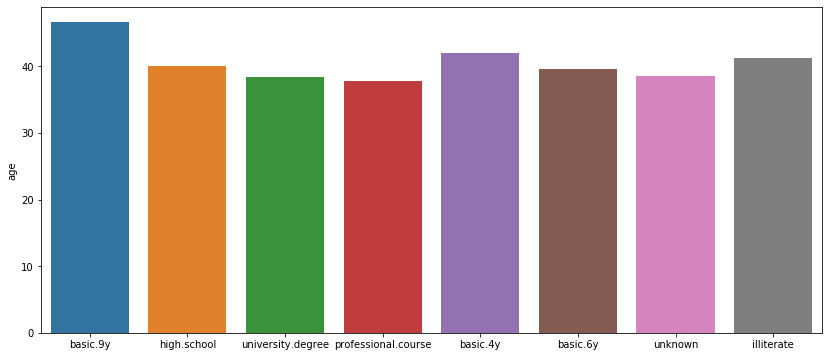

In [31]:
plt.figure(figsize=(14,6)) #making the plot bigger

#plotting the figure
sns.barplot(data.education.unique(), 
        data.groupby('education')['age'].mean())
plt.show()

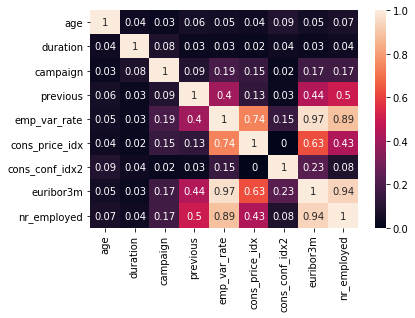

In [32]:
#let's visualise correlations between variables by heatmap
sns.heatmap(data_numeric.corr().abs().round(2),annot=True)
plt.show()